# BBox with profiling
The main goal of this notebook is to create a pipeline, starting from the image obtained from the blur bbox, to further refine the bbox.

In [12]:
from covidxpert import load_image, perspective_correction, blur_bbox
from glob import glob
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [13]:
def profile_bbox(image:np.ndarray)->np.ndarray:
    """Function to further refine image bbox using profiling."""
    return image

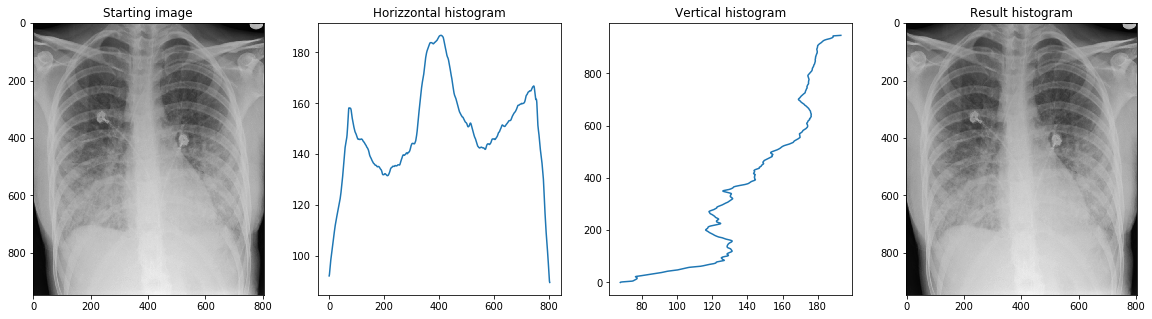

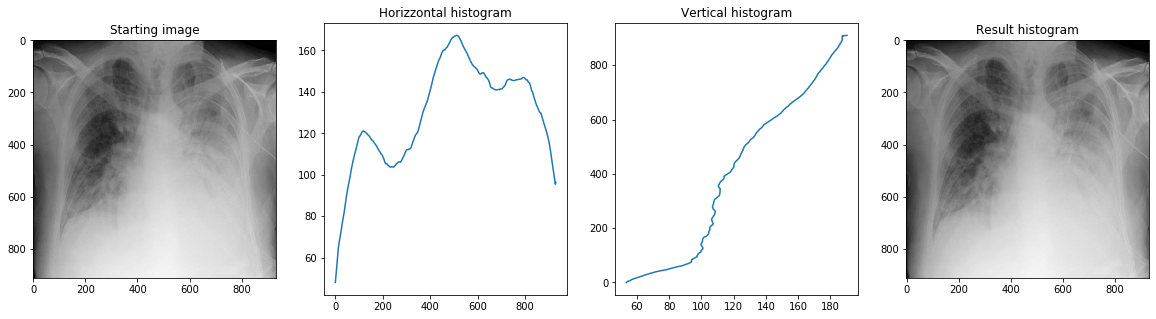

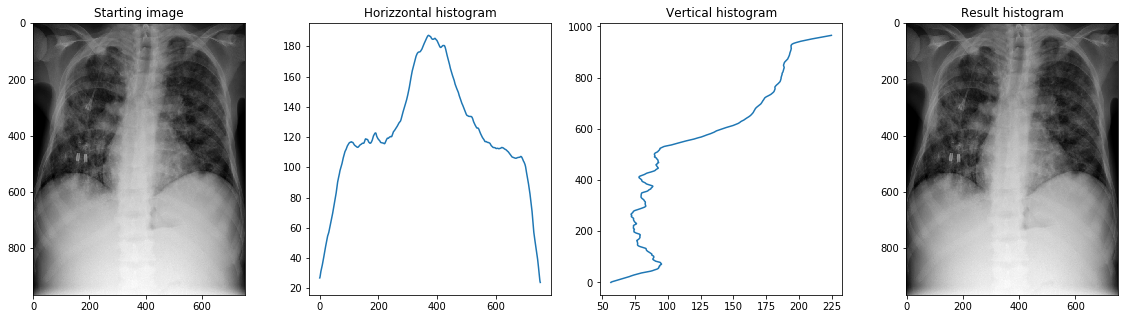

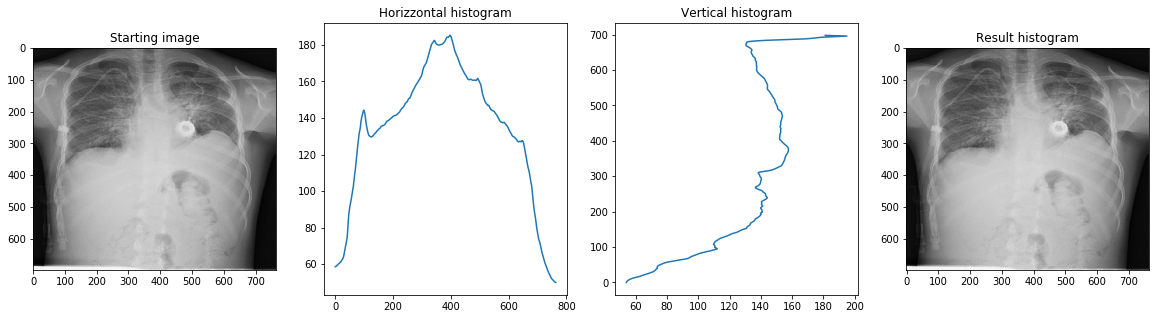

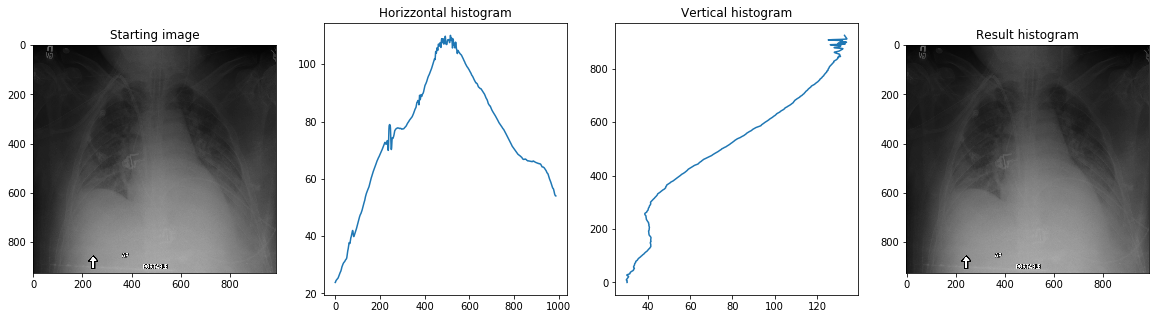

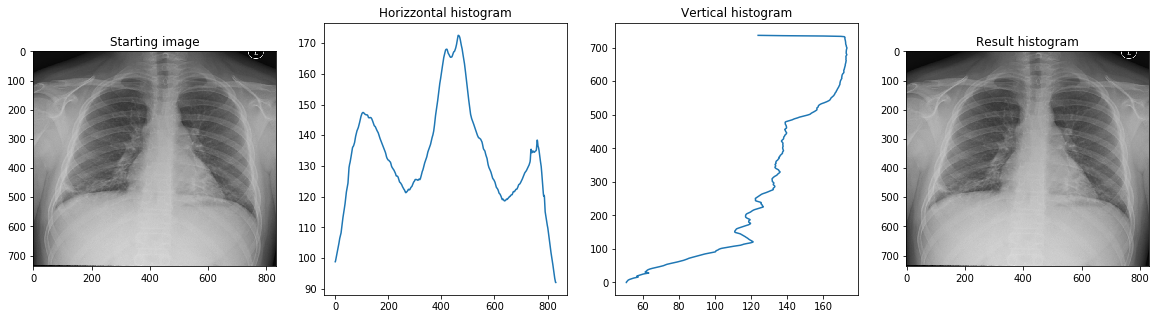

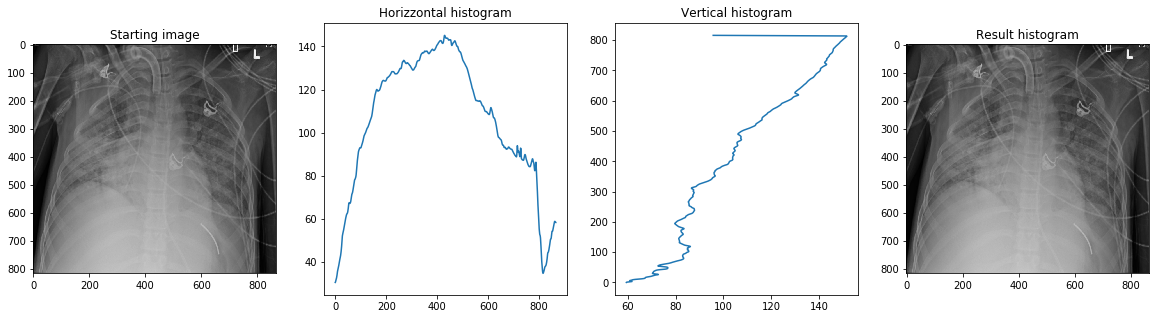

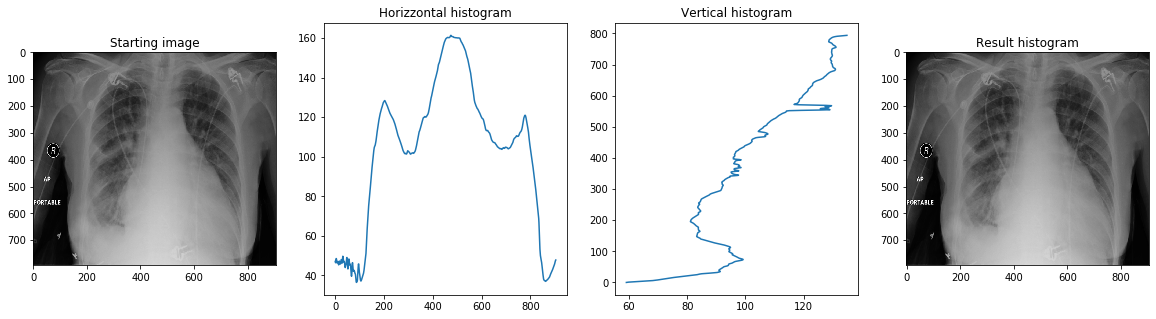

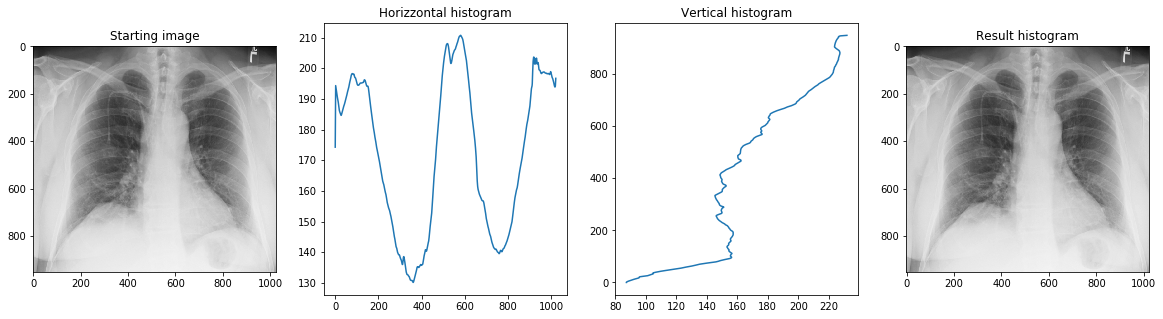

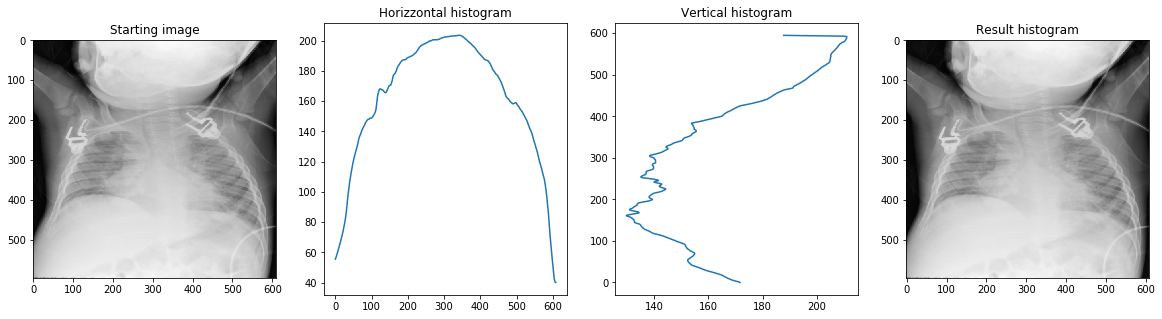

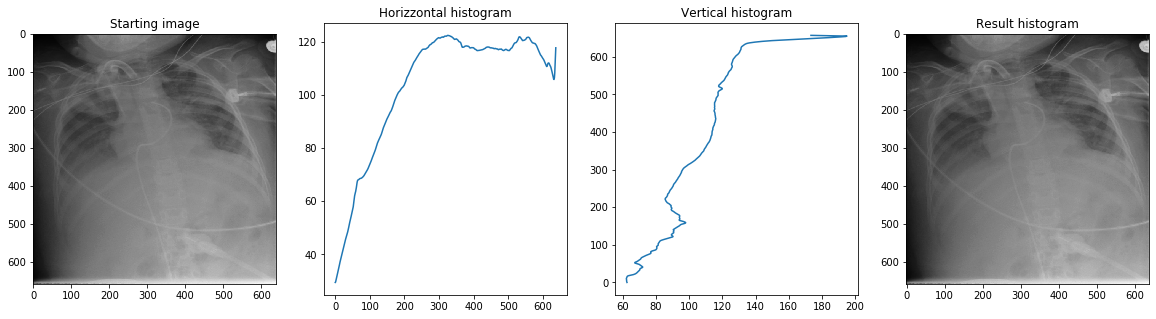

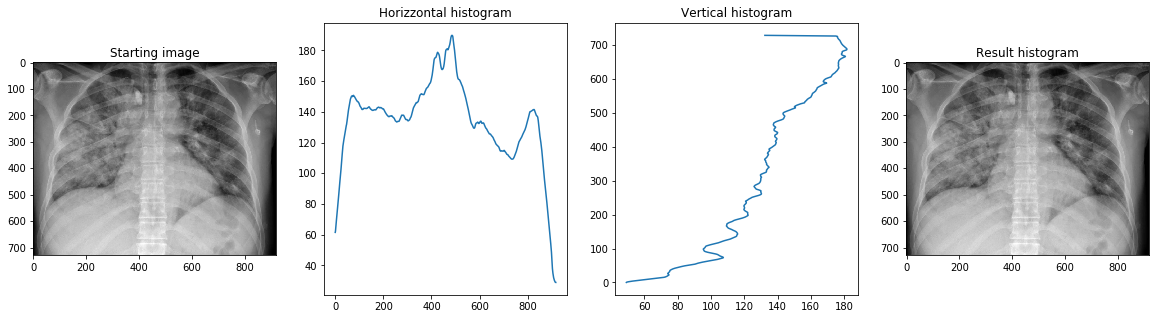

In [16]:
for path in tqdm(glob("tests/test_images/*.jpg")):
    image = blur_bbox(perspective_correction(load_image(path)))
    
    blurred = cv2.medianBlur(image, 3)
    blurred = cv2.GaussianBlur(blurred, (3,3), 0)
    
    x = blurred.mean(axis=0)
    y = blurred.mean(axis=1)
    
    result = profile_bbox(image)
    
    figures = 4
    fig, axes = plt.subplots(ncols=figures, figsize=(5*figures, 5))
    
    axes[0].imshow(image, cmap="gray")
    axes[0].set_title("Starting image")
    axes[1].plot(x)
    axes[1].set_title("Horizzontal histogram")
    axes[2].plot(y, range(len(y)))
    axes[2].set_title("Vertical histogram")
    axes[3].imshow(result, cmap="gray")
    axes[3].set_title("Result histogram")
    plt.show()